In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#Load Data
msa_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/4_MSA_LQ.csv')
pop_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/1_PopChange_10_16.csv')
income_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/2_Income_Incr_10_16.csv')
emp_data = pd.read_csv('/content/drive/MyDrive/MLC Final Project/3_Emp_Incr_10_16.csv')

In [ ]:
#Classify Data
pop_data['PopCategory'] = -100
for i in range(len(pop_data)):
  if ((pop_data['PopChange'][i] >= 0) & (pop_data['PopChange'][i] <= 1)):
    pop_data['PopCategory'][i] = "Small Increase"
  elif ((pop_data['PopChange'][i] > 1)):
    pop_data['PopCategory'][i] = "Large Increase"
  elif (pop_data['PopChange'][i] < 0):
    pop_data['PopCategory'][i] = "Decrease"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
income_data['incomeCategory'] = -100
for i in range(len(income_data)):
  if ((income_data['IncomeChange'][i] >= 0) & (income_data['IncomeChange'][i] <= 1)):
    income_data['incomeCategory'][i] = "Small Increase"
  elif ((income_data['IncomeChange'][i] > 1)):
    income_data['incomeCategory'][i] = "Large Increase"
  elif (income_data['IncomeChange'][i] < 0):
    income_data['incomeCategory'][i] = "Decrease"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
emp_data['empCategory'] = -100
for i in range(len(emp_data)):
  if ((emp_data['EmpChange'][i] >= 0) & (emp_data['EmpChange'][i] <= 1)):
    emp_data['empCategory'][i] = "Small Increase"
  elif ((emp_data['EmpChange'][i] > 1)):
    emp_data['empCategory'][i] = "Large Increase"
  elif (emp_data['EmpChange'][i] < 0):
    emp_data['empCategory'][i] = "Decrease"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
for column in msa_data.columns:
  if column != 'MSA' and column != 'PopChange':
    msa_data[column] = msa_data[column]>=msa_data[column].median()

In [ ]:
df_std = msa_data.merge(pop_data[['msaID','PopChange', 'PopCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std2 = msa_data.merge(income_data[['msaID','IncomeChange', 'incomeCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)
df_std3 = msa_data.merge(emp_data[['msaID','EmpChange', 'empCategory']], left_on='MSA',right_on='msaID').drop('msaID',axis=1)

In [ ]:
df_std_train, df_std_test = train_test_split(df_std,random_state=999,test_size=0.3)
df_std_train_X = df_std_train.loc[:, 'Agriculture':'Public_Administration']
df_std_train_Y = df_std_train['PopCategory']
df_std_test_X = df_std_test.loc[:, 'Agriculture':'Public_Administration']
df_std_test_Y = df_std_test['PopCategory']

df_std2_train, df_std2_test = train_test_split(df_std2,random_state=999,test_size=0.3)
df_std2_train_X = df_std2_train.loc[:, 'Agriculture':'Public_Administration']
df_std2_train_Y = df_std2_train['incomeCategory']
df_std2_test_X = df_std2_test.loc[:, 'Agriculture':'Public_Administration']
df_std2_test_Y = df_std2_test['incomeCategory']

df_std3_train, df_std3_test = train_test_split(df_std3,random_state=999,test_size=0.3)
df_std3_train_X = df_std3_train.loc[:, 'Agriculture':'Public_Administration']
df_std3_train_Y = df_std3_train['empCategory']
df_std3_test_X = df_std3_test.loc[:, 'Agriculture':'Public_Administration']
df_std3_test_Y = df_std3_test['empCategory']

#Population

In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std_train_X,df_std_train_Y)
print(rs.best_params_)

{'max_leaf_nodes': 6, 'n_estimators': 41}


<BarContainer object of 20 artists>

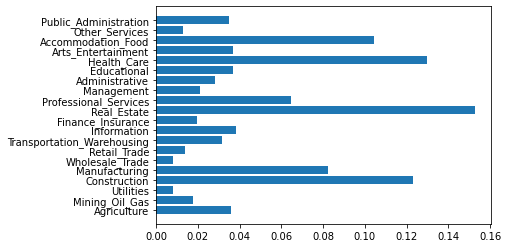

In [ ]:
rf = RandomForestClassifier(n_estimators=rs.best_params_['n_estimators'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'], random_state = 999)
rf.fit(df_std_train_X,df_std_train_Y)
plt.barh(df_std_train_X.columns, rf.feature_importances_)

In [ ]:
predicted_train = rf.predict(df_std_train_X)
print("In sample:",(df_std_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std_test_X)
print("Out of sample:",(df_std_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.6984732824427481
Out of sample: 0.5309734513274337


#Income

In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std2_train_X,df_std2_train_Y)
print(rs.best_params_)

{'max_leaf_nodes': 8, 'n_estimators': 31}


<BarContainer object of 20 artists>

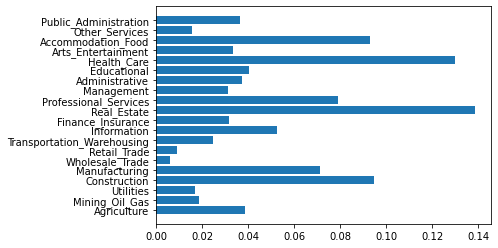

In [ ]:
rf = RandomForestClassifier(n_estimators=rs.best_params_['n_estimators'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'], random_state = 999)
rf.fit(df_std2_train_X,df_std2_train_Y)
rf.fit(df_std_train_X,df_std_train_Y)
plt.barh(df_std_train_X.columns, rf.feature_importances_)

In [ ]:
predicted_train = rf.predict(df_std2_train_X)
print("In sample:",(df_std2_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std2_test_X)
print("Out of sample:",(df_std2_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.4122137404580153
Out of sample: 0.40707964601769914


#Employement

In [ ]:
param_grid = {'n_estimators':range(1,51,5),'max_leaf_nodes': range(2,10)}
rf = RandomForestClassifier()
gs = GridSearchCV(rf,param_grid=param_grid)
rs = gs.fit(df_std3_train_X,df_std3_train_Y)
print(rs.best_params_)

{'max_leaf_nodes': 8, 'n_estimators': 21}


<BarContainer object of 20 artists>

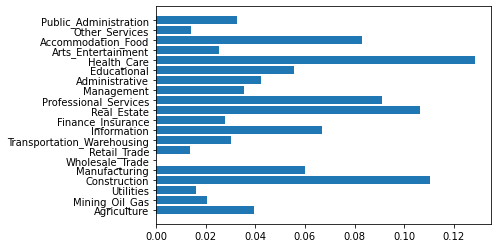

In [ ]:
rf = RandomForestClassifier(n_estimators=rs.best_params_['n_estimators'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'], random_state = 999)
rf.fit(df_std3_train_X,df_std3_train_Y)
rf.fit(df_std_train_X,df_std_train_Y)
plt.barh(df_std_train_X.columns, rf.feature_importances_)

In [ ]:
predicted_train = rf.predict(df_std3_train_X)
print("In sample:",(df_std3_train_Y.reset_index(drop=True)==predicted_train).mean())

predicted_test = rf.predict(df_std3_test_X)
print("Out of sample:",(df_std3_test_Y.reset_index(drop=True)==predicted_test).mean())

In sample: 0.4015151515151515
Out of sample: 0.37719298245614036
